In [ ]:
!pip install py0@git+https://github.com/ur-whitelab/py0.git

In [1]:
import py0
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trajs = np.load(f'data/sample_traj_beauty.npy')

This is `fancy_shading` from py0

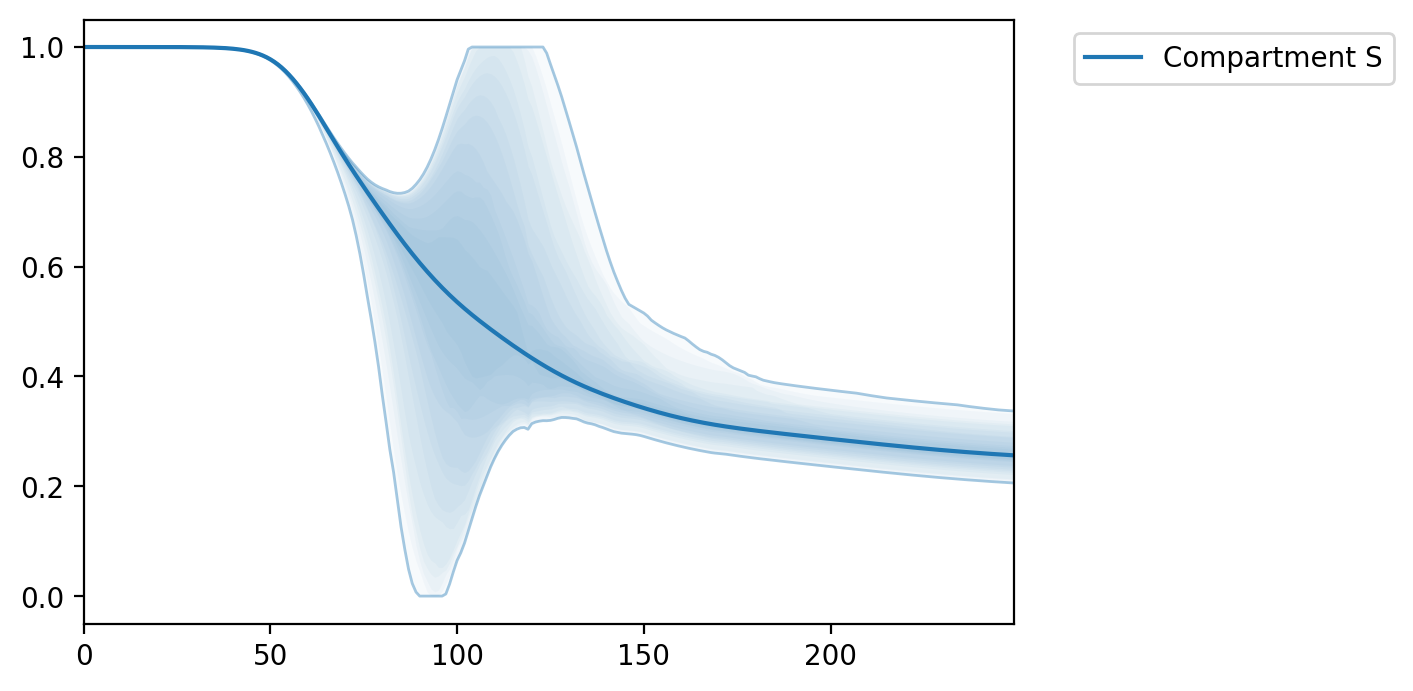

In [9]:
full_compartments = ['S', 'E', 'A', 'I', 'R']
fig, axes = plt.subplots(dpi=200)
py0.traj_quantile(trajs[:,:,0,[0]], lower_q_bound=1/3, upper_q_bound=2/3, n_shading_gradients=15,
               figsize=(10, 6), alpha=0.03, names=full_compartments, fancy_shading=True, ax=axes)

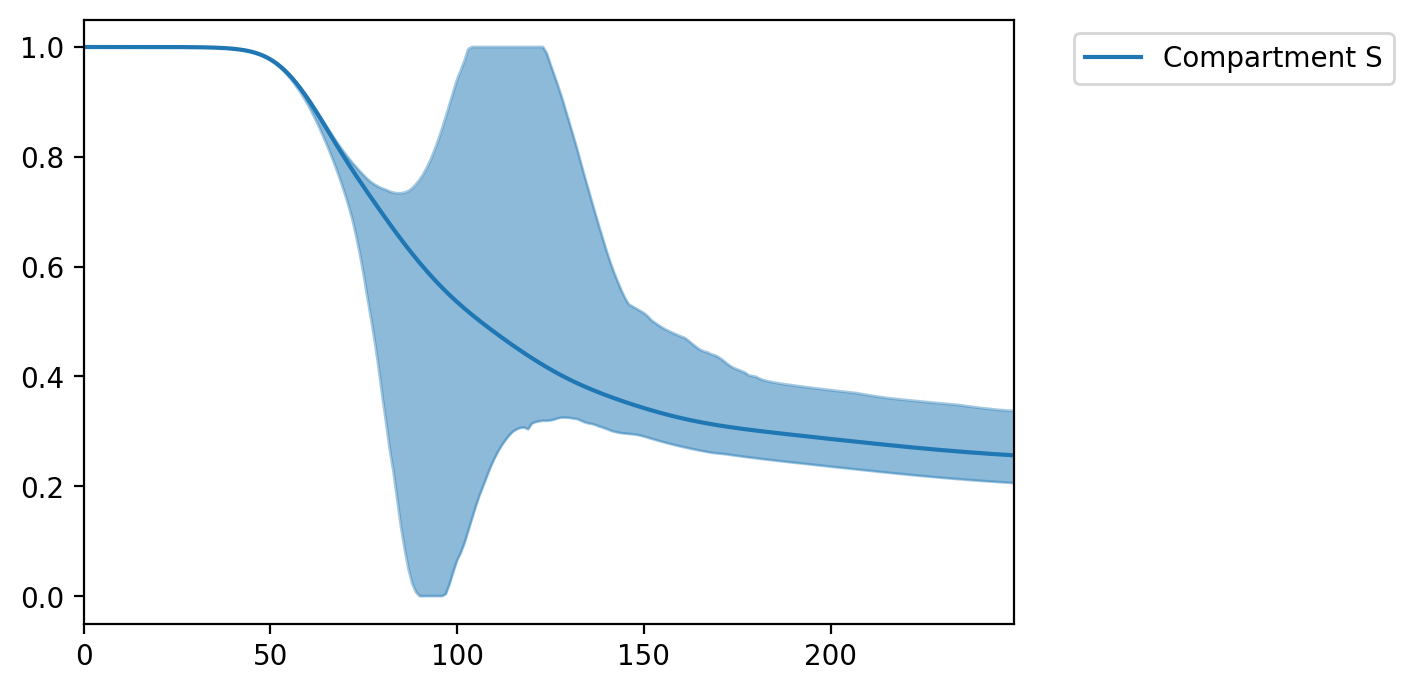

In [14]:
# Try without fancy shading and get matplotlib.axes and use it as input to beautify
full_compartments = ['S', 'E', 'A', 'I', 'R']
fig, axes = plt.subplots(dpi=200)
py0.traj_quantile(trajs[:,:,0,[0]], lower_q_bound=1/3, upper_q_bound=2/3, n_shading_gradients=15,
               figsize=(10, 6), alpha=0.5, names=full_compartments, fancy_shading=False, ax=axes)
ax = plt.gca()

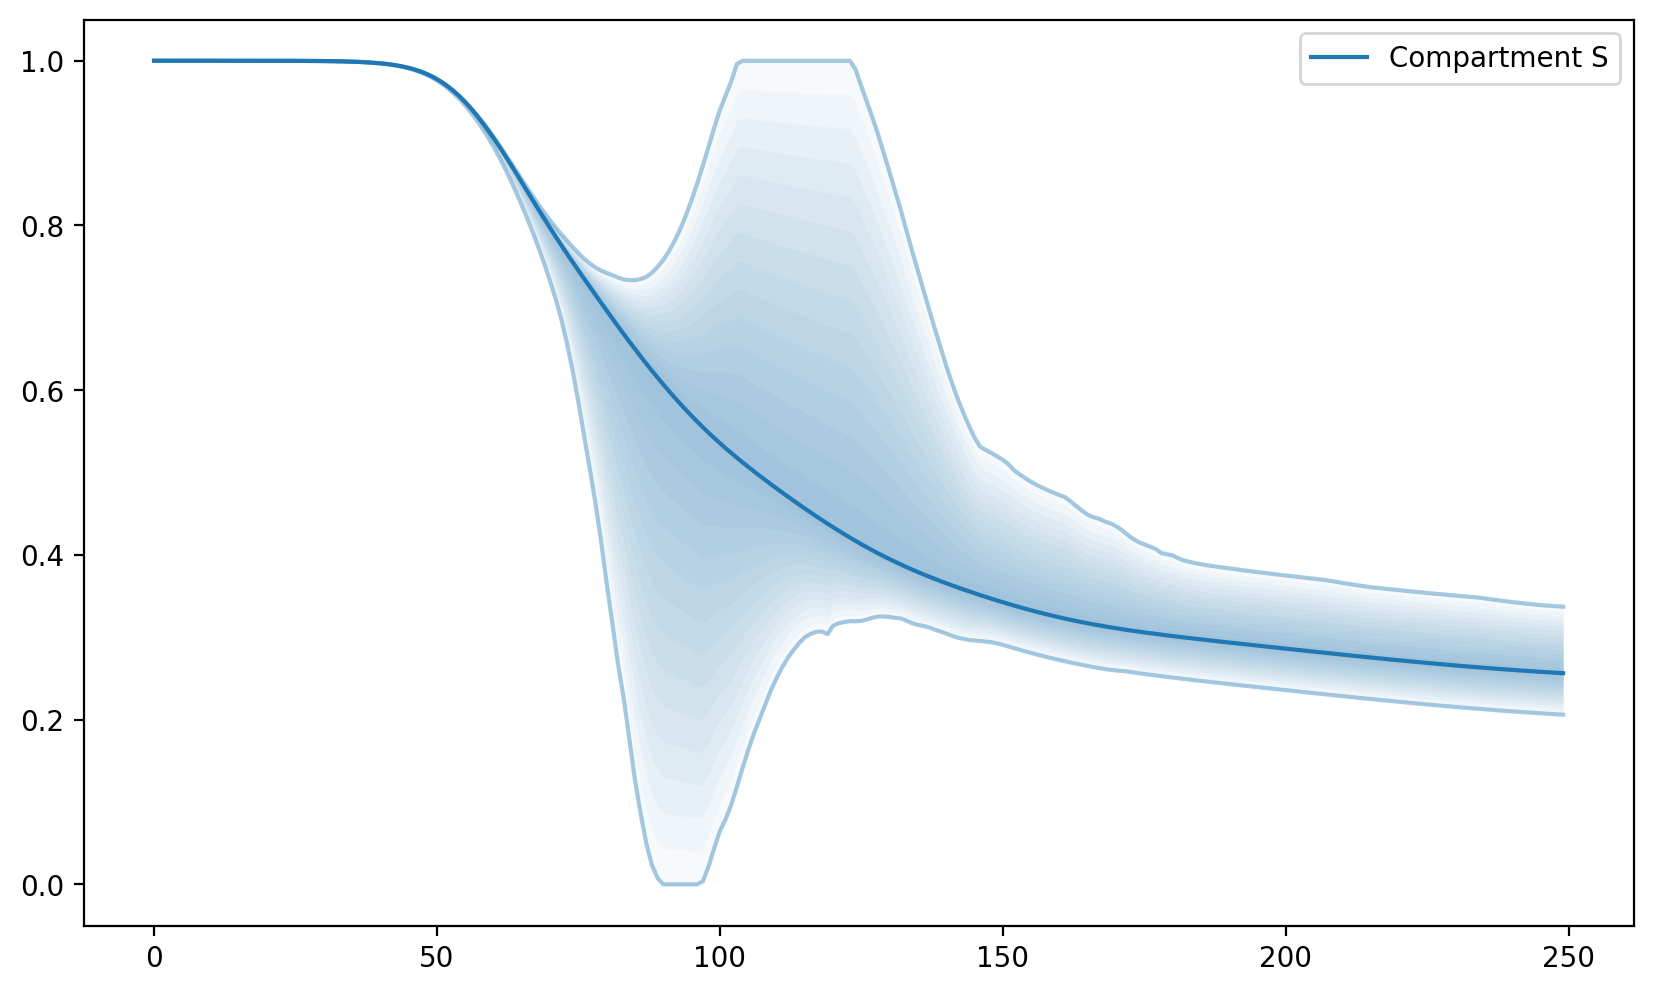

In [15]:
def beautify(ax, alpha = 0.035, n_shading_gradients=15):
    import matplotlib as mpl
    children = axes.get_children()
    line_data = []
    fig, new_ax = plt.subplots(dpi=200, figsize=(10, 6))
    for i, child in enumerate(children):
    #     if type(child) == 'matplotlib.lines.Line2D':
#         if isinstance(child, mpl.legend.Legend):
#             leg = child
        if isinstance(child, mpl.lines.Line2D):
            line_data.append(child.get_data())
            new_ax.plot(*child.get_data(), color = child.get_color(), alpha=child.get_alpha())
    line_data=np.array(line_data)
    x = np.array(line_data)[2,0,:]
    top = np.array(line_data)[2,1,:]
    mid = np.array(line_data)[0,1,:]
    bot = np.array(line_data)[1,1,:]
    fill_lines_top = np.linspace(top, mid, n_shading_gradients)
    fill_lines_bot = np.linspace(bot, mid, n_shading_gradients)
    legends = [c for c in axes.get_children() if isinstance(c, mpl.legend.Legend)]
    for n in range(n_shading_gradients):
        new_ax.fill_between(x, fill_lines_top[n], mid, alpha=alpha, color='C0',linewidth=0, rasterized=True)
        new_ax.fill_between(x, fill_lines_bot[n], mid, alpha=alpha, color='C0',linewidth=0, rasterized=True)
    handles, labels = axes.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(
        zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), bbox_to_anchor=(1.05, 1))
    plt.legend(handles=handles)

beautify(axes)